In [2]:
import numpy as np
from numpy import pi, cos
from numpy.fft import fft, fftshift

import scipy.signal as signal
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid": True, "font.size": 14})

### Exercício 1

- Realizar um processo de modulação AM DSB e AM DSB-SC
- Para o caso da modulação AM DSB-SC, realizar o processo de demodulação utilizando a função `fir1`
- Para o caso da modulação AM DSB, variar o `fator de modulação` (0.25; 0.5; 0.75; 1 e 1.5) e observar os efeitos no sinal modulado

In [3]:
fs = int(1e6)
ts = 1 / fs
t = np.arange(0, 1, ts)
f = np.arange(-fs / 2, fs / 2, 1)

#### AM DSC TC

In [4]:
fm = int(1e3)
Am = 1
Ac = 1

m_t = Am * np.cos(2 * np.pi * fm * t)
M_f = np.fft.fftshift(np.fft.fft(m_t) / len(m_t))

fc = int(10e3)
c_t = Ac * np.cos(2 * np.pi * fc * t)
C_f = np.fft.fftshift(np.fft.fft(c_t) / len(c_t))

mu = 1.5
s_t = (m_t + mu) * c_t
S_f = np.fft.fftshift(np.fft.fft(s_t) / len(s_t))

r_t = s_t * c_t
R_f = np.fft.fftshift(np.fft.fft(r_t) / len(r_t))

f_cut = int(2e3)

filtro_pb = np.concatenate(
    (np.zeros(int(fs / 2 - f_cut)), np.ones(f_cut * 2), np.zeros(int(fs / 2 - f_cut)))
)

M_hat_f = 2 * R_f * filtro_pb
m_hat_t = np.fft.ifft(np.fft.ifftshift(M_hat_f)) * len(M_hat_f)

/home/gabrielluizep/miniconda3/envs/eng/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gabrielluizep/miniconda3/envs/eng/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


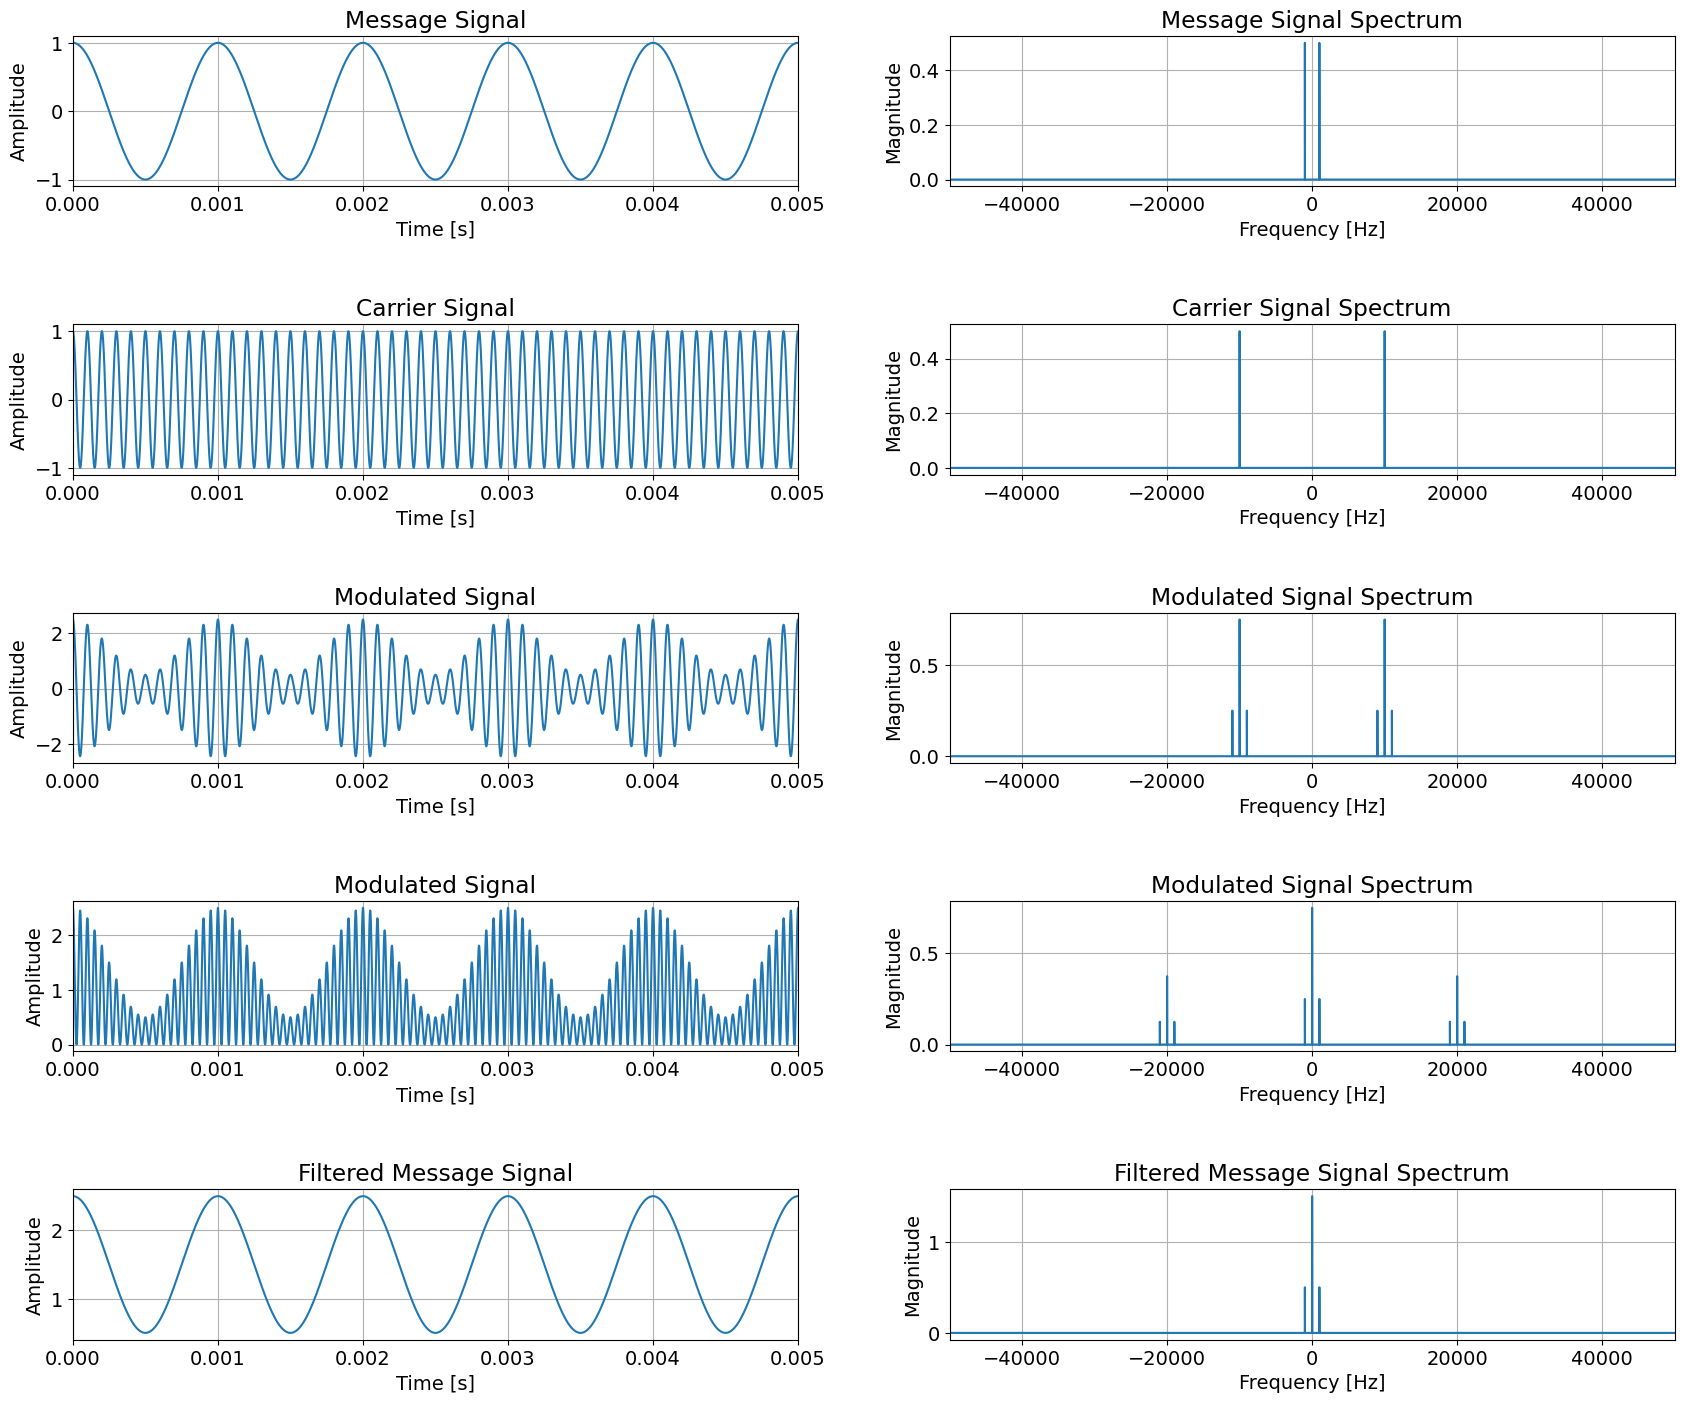

In [5]:
fig, axs = plt.subplots(5, 2, figsize=(18, 15))

axs[0, 0].plot(t, m_t)
axs[0, 0].set_title("Message Signal")
axs[0, 0].set_xlabel("Time [s]")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].set_xlim(0, 5 * (1 / fm))

axs[0, 1].plot(f, np.abs(M_f))
axs[0, 1].set_title("Message Signal Spectrum")
axs[0, 1].set_xlabel("Frequency [Hz]")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(-50e3, 50e3)

axs[1, 0].plot(t, c_t)
axs[1, 0].set_title("Carrier Signal")
axs[1, 0].set_xlabel("Time [s]")
axs[1, 0].set_ylabel("Amplitude")
axs[1, 0].set_xlim(0, 5 * (1 / fm))

axs[1, 1].plot(f, np.abs(C_f))
axs[1, 1].set_title("Carrier Signal Spectrum")
axs[1, 1].set_xlabel("Frequency [Hz]")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-50e3, 50e3)

axs[2, 0].plot(t, s_t)
axs[2, 0].set_title("Modulated Signal")
axs[2, 0].set_xlabel("Time [s]")
axs[2, 0].set_ylabel("Amplitude")
axs[2, 0].set_xlim(0, 5 * (1 / fm))

axs[2, 1].plot(f, np.abs(S_f))
axs[2, 1].set_title("Modulated Signal Spectrum")
axs[2, 1].set_xlabel("Frequency [Hz]")
axs[2, 1].set_ylabel("Magnitude")
axs[2, 1].set_xlim(-50e3, 50e3)

axs[3, 0].plot(t, r_t)
axs[3, 0].set_title("Modulated Signal")
axs[3, 0].set_xlabel("Time [s]")
axs[3, 0].set_ylabel("Amplitude")
axs[3, 0].set_xlim(0, 5 * (1 / fm))

axs[3, 1].plot(f, np.abs(R_f))
axs[3, 1].set_title("Modulated Signal Spectrum")
axs[3, 1].set_xlabel("Frequency [Hz]")
axs[3, 1].set_ylabel("Magnitude")
axs[3, 1].set_xlim(-50e3, 50e3)

axs[4, 0].plot(t, m_hat_t)
axs[4, 0].set_title("Filtered Message Signal")
axs[4, 0].set_xlabel("Time [s]")
axs[4, 0].set_ylabel("Amplitude")
axs[4, 0].set_xlim(0, 5 * (1 / fm))

axs[4, 1].plot(f, np.abs(M_hat_f))
axs[4, 1].set_title("Filtered Message Signal Spectrum")
axs[4, 1].set_xlabel("Frequency [Hz]")
axs[4, 1].set_ylabel("Magnitude")
axs[4, 1].set_xlim(-50e3, 50e3)

plt.tight_layout(pad=3)
plt.show()

In [6]:
s_t_025 = (m_t + 0.25) * c_t
s_t_050 = (m_t + 0.50) * c_t
s_t_075 = (m_t + 0.75) * c_t
s_t_100 = (m_t + 1.00) * c_t
s_t_150 = (m_t + 1.50) * c_t

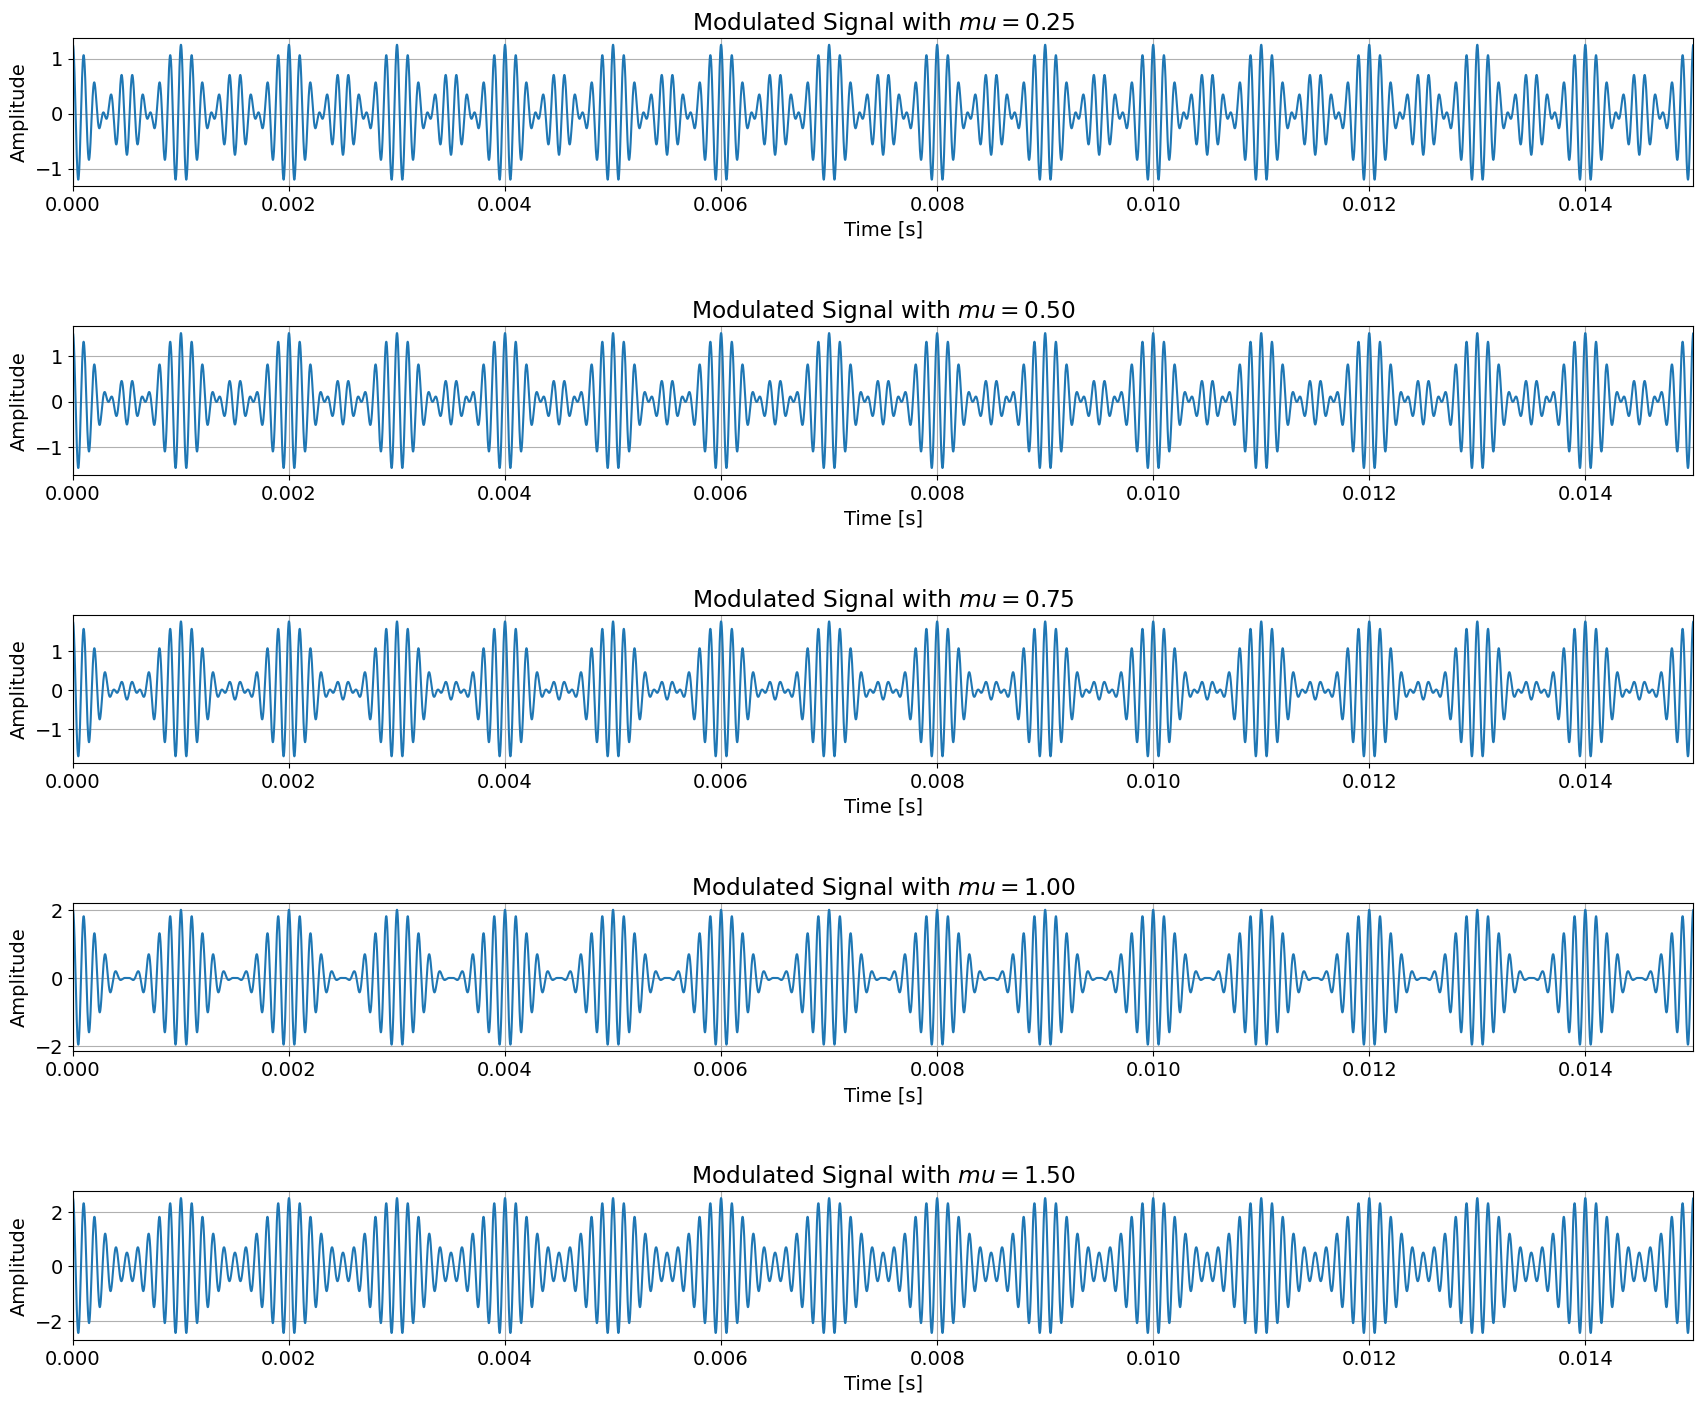

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(18, 15))

axs[0].plot(t, s_t_025)
axs[0].set_title("Modulated Signal with $mu = 0.25$")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlim(0, 15 * (1 / fm))

axs[1].plot(t, s_t_050)
axs[1].set_title("Modulated Signal with $mu = 0.50$")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Amplitude")
axs[1].set_xlim(0, 15 * (1 / fm))

axs[2].plot(t, s_t_075)
axs[2].set_title("Modulated Signal with $mu = 0.75$")
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Amplitude")
axs[2].set_xlim(0, 15 * (1 / fm))

axs[3].plot(t, s_t_100)
axs[3].set_title("Modulated Signal with $mu = 1.00$")
axs[3].set_xlabel("Time [s]")
axs[3].set_ylabel("Amplitude")
axs[3].set_xlim(0, 15 * (1 / fm))

axs[4].plot(t, s_t_150)
axs[4].set_title("Modulated Signal with $mu = 1.50$")
axs[4].set_xlabel("Time [s]")
axs[4].set_ylabel("Amplitude")
axs[4].set_xlim(0, 15 * (1 / fm))

plt.tight_layout(pad=3)
plt.show()

#### AM DSB SC

In [8]:
fm = int(5e3)
Am = 5
m_t = Am * cos(2 * pi * fm * t)
M_f = fftshift(fft(m_t) / len(m_t))

fc = int(50e3)
Ac = 1
c_t = Ac * cos(2 * pi * fc * t)
C_f = fftshift(fft(c_t) / len(c_t))

s_t = m_t * c_t
S_f = fftshift(fft(s_t) / len(s_t))

r_t = s_t * c_t
R_f = fftshift(fft(r_t) / len(r_t))

h = signal.firwin(51, 2 * fm, fs=fs)
m_hat_t = 2 * signal.lfilter(h, 1, r_t)
M_hat_f = fftshift(fft(m_hat_t, len(f)))

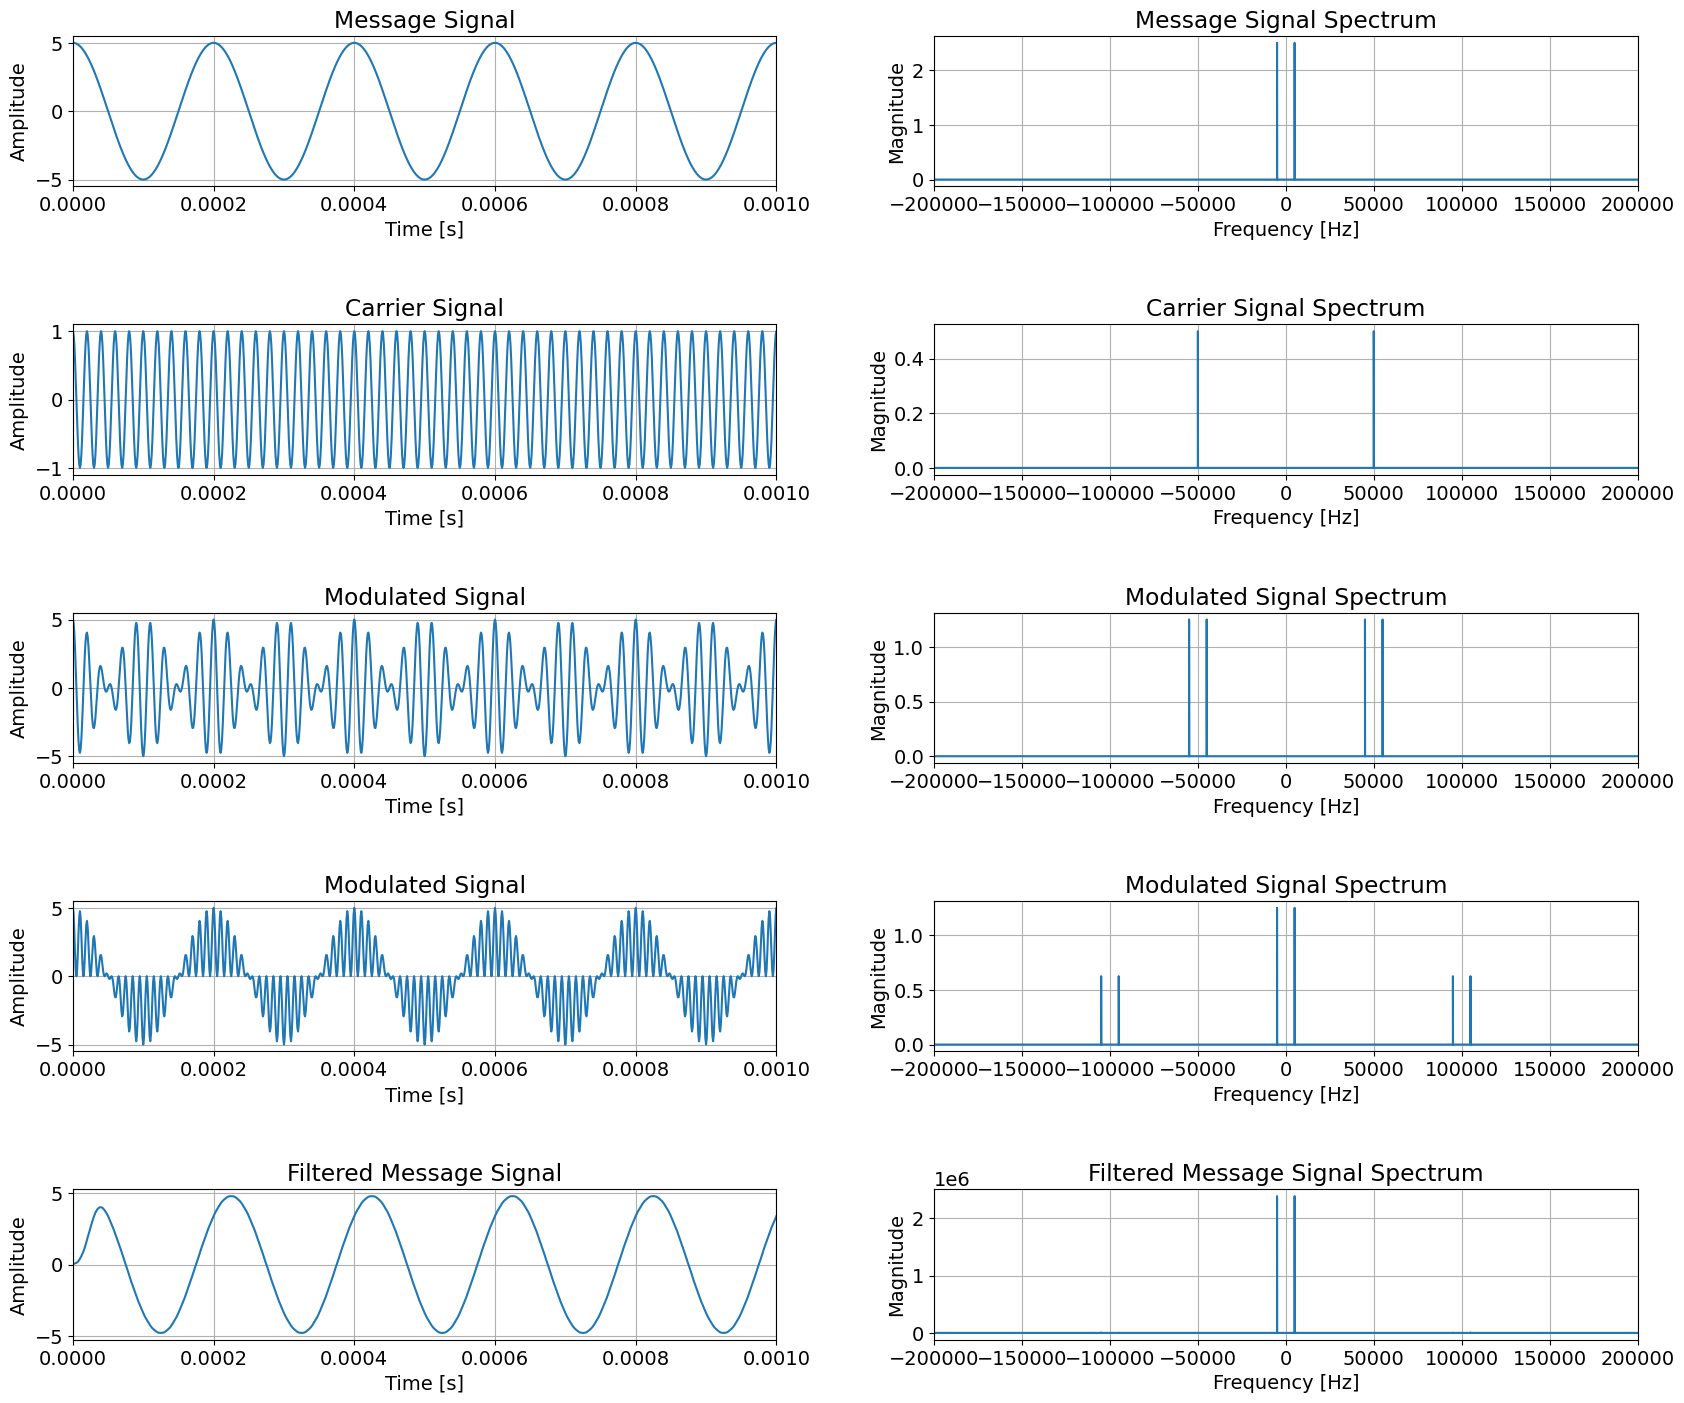

In [9]:
fig, axs = plt.subplots(5, 2, figsize=(18, 15))

axs[0, 0].plot(t, m_t)
axs[0, 0].set_title("Message Signal")
axs[0, 0].set_xlabel("Time [s]")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].set_xlim(0, 5 * (1 / fm))

axs[0, 1].plot(f, np.abs(M_f))
axs[0, 1].set_title("Message Signal Spectrum")
axs[0, 1].set_xlabel("Frequency [Hz]")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(-200e3, 200e3)

axs[1, 0].plot(t, c_t)
axs[1, 0].set_title("Carrier Signal")
axs[1, 0].set_xlabel("Time [s]")
axs[1, 0].set_ylabel("Amplitude")
axs[1, 0].set_xlim(0, 5 * (1 / fm))

axs[1, 1].plot(f, np.abs(C_f))
axs[1, 1].set_title("Carrier Signal Spectrum")
axs[1, 1].set_xlabel("Frequency [Hz]")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-200e3, 200e3)

axs[2, 0].plot(t, s_t)
axs[2, 0].set_title("Modulated Signal")
axs[2, 0].set_xlabel("Time [s]")
axs[2, 0].set_ylabel("Amplitude")
axs[2, 0].set_xlim(0, 5 * (1 / fm))

axs[2, 1].plot(f, np.abs(S_f))
axs[2, 1].set_title("Modulated Signal Spectrum")
axs[2, 1].set_xlabel("Frequency [Hz]")
axs[2, 1].set_ylabel("Magnitude")
axs[2, 1].set_xlim(-200e3, 200e3)

axs[3, 0].plot(t, r_t)
axs[3, 0].set_title("Modulated Signal")
axs[3, 0].set_xlabel("Time [s]")
axs[3, 0].set_ylabel("Amplitude")
axs[3, 0].set_xlim(0, 5 * (1 / fm))

axs[3, 1].plot(f, np.abs(R_f))
axs[3, 1].set_title("Modulated Signal Spectrum")
axs[3, 1].set_xlabel("Frequency [Hz]")
axs[3, 1].set_ylabel("Magnitude")
axs[3, 1].set_xlim(-200e3, 200e3)

axs[4, 0].plot(t, m_hat_t)
axs[4, 0].set_title("Filtered Message Signal")
axs[4, 0].set_xlabel("Time [s]")
axs[4, 0].set_ylabel("Amplitude")
axs[4, 0].set_xlim(0, 5 * (1 / fm))

axs[4, 1].plot(f, np.abs(M_hat_f))
axs[4, 1].set_title("Filtered Message Signal Spectrum")
axs[4, 1].set_xlabel("Frequency [Hz]")
axs[4, 1].set_ylabel("Magnitude")
axs[4, 1].set_xlim(-200e3, 200e3)

plt.tight_layout(pad=3)
plt.show()

### Exercício 2

- Gerar 3 sinais (cosenos) nas frequências de 1, 2 e 3 kHz
- Realizar a multiplexação dos sinais para as frequências 10, 12 e 14 kHz para a transmissão em um canal de comunicação
- Recuperar os sinais originais

In [20]:
m1_t = cos(2 * pi * 1e3 * t)
m2_t = cos(2 * pi * 2e3 * t)
m3_t = cos(2 * pi * 3e3 * t)

c1_t = cos(2 * pi * 10e3 * t)
c2_t = cos(2 * pi * 12e3 * t)
c3_t = cos(2 * pi * 14e3 * t)

s1_t = m1_t * c1_t
f_cut = int(10e3)
filtro_pb = np.concatenate(
    (np.zeros(int(fs / 2 - f_cut)), np.ones(f_cut * 2), np.zeros(int(fs / 2 - f_cut)))
)
S1_f = fftshift(fft(s1_t) / len(s1_t))
S1_ssb_f = S1_f * filtro_pb


s2_t = m2_t * c2_t
f_cut = int(12e3)
filtro_pb = np.concatenate(
    (np.zeros(int(fs / 2 - f_cut)), np.ones(f_cut * 2), np.zeros(int(fs / 2 - f_cut)))
)
S2_f = fftshift(fft(s2_t) / len(s2_t))
S2_ssb_f = S2_f * filtro_pb

s3_t = m3_t * c3_t
f_cut = int(14e3)
filtro_pb = np.concatenate(
    (np.zeros(int(fs / 2 - f_cut)), np.ones(f_cut * 2), np.zeros(int(fs / 2 - f_cut)))
)
S3_f = fftshift(fft(s3_t) / len(s3_t))
S3_ssb_f = S3_f * filtro_pb

S_f = S1_f + S2_f + S3_f
S_ssb_f = S1_ssb_f + S2_ssb_f + S3_ssb_f

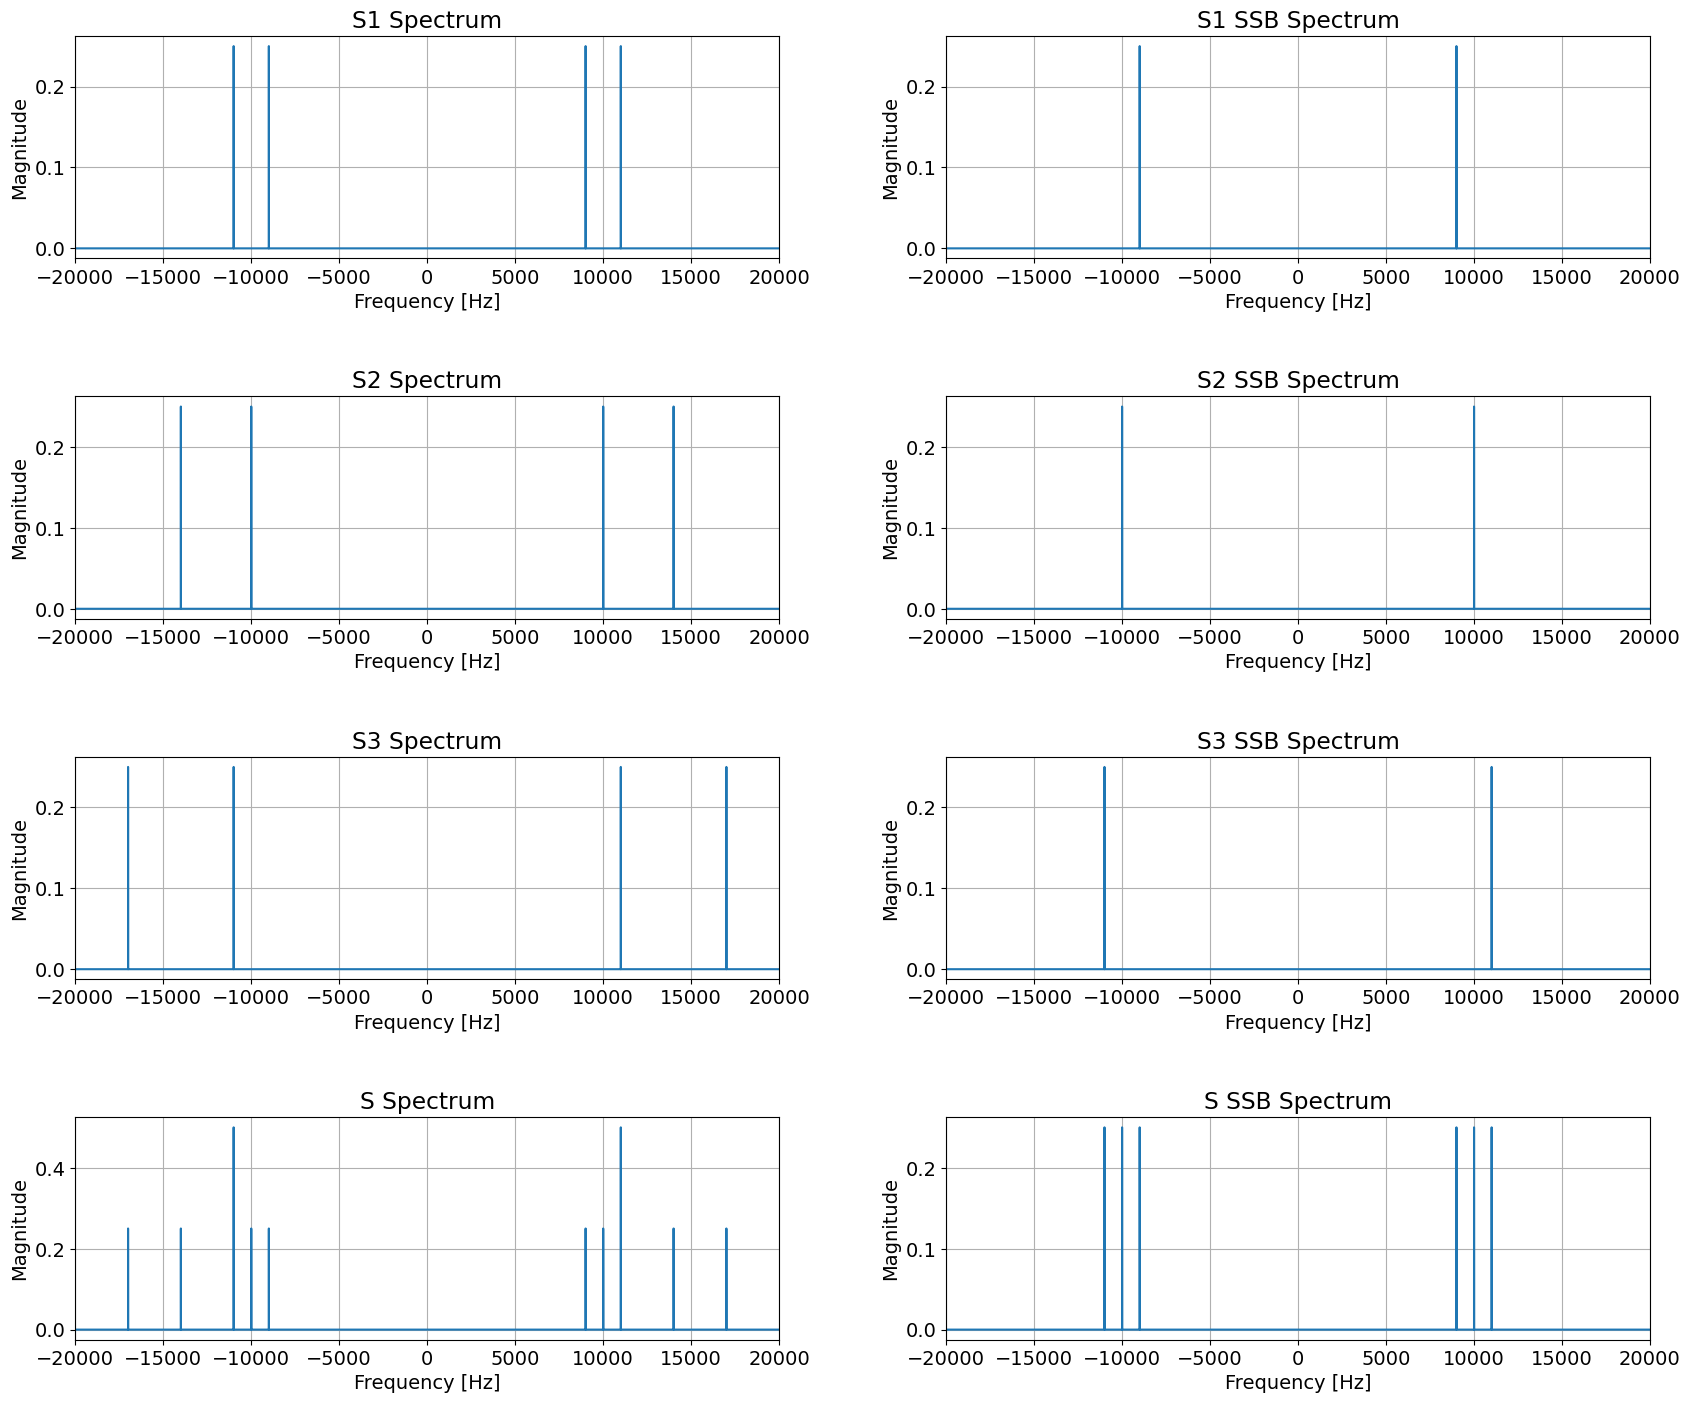

In [21]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15))

axs[0, 0].plot(f, np.abs(S1_f))
axs[0, 0].set_title("S1 Spectrum")
axs[0, 0].set_xlabel("Frequency [Hz]")
axs[0, 0].set_ylabel("Magnitude")
axs[0, 0].set_xlim(-20e3, 20e3)

axs[0, 1].plot(f, np.abs(S1_ssb_f))
axs[0, 1].set_title("S1 SSB Spectrum")
axs[0, 1].set_xlabel("Frequency [Hz]")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(-20e3, 20e3)

axs[1, 0].plot(f, np.abs(S2_f))
axs[1, 0].set_title("S2 Spectrum")
axs[1, 0].set_xlabel("Frequency [Hz]")
axs[1, 0].set_ylabel("Magnitude")
axs[1, 0].set_xlim(-20e3, 20e3)

axs[1, 1].plot(f, np.abs(S2_ssb_f))
axs[1, 1].set_title("S2 SSB Spectrum")
axs[1, 1].set_xlabel("Frequency [Hz]")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-20e3, 20e3)

axs[2, 0].plot(f, np.abs(S3_f))
axs[2, 0].set_title("S3 Spectrum")
axs[2, 0].set_xlabel("Frequency [Hz]")
axs[2, 0].set_ylabel("Magnitude")
axs[2, 0].set_xlim(-20e3, 20e3)

axs[2, 1].plot(f, np.abs(S3_ssb_f))
axs[2, 1].set_title("S3 SSB Spectrum")
axs[2, 1].set_xlabel("Frequency [Hz]")
axs[2, 1].set_ylabel("Magnitude")
axs[2, 1].set_xlim(-20e3, 20e3)

axs[3, 0].plot(f, np.abs(S_f))
axs[3, 0].set_title("S Spectrum")
axs[3, 0].set_xlabel("Frequency [Hz]")
axs[3, 0].set_ylabel("Magnitude")
axs[3, 0].set_xlim(-20e3, 20e3)

axs[3, 1].plot(f, np.abs(S_ssb_f))
axs[3, 1].set_title("S SSB Spectrum")
axs[3, 1].set_xlabel("Frequency [Hz]")
axs[3, 1].set_ylabel("Magnitude")
axs[3, 1].set_xlim(-20e3, 20e3)

plt.tight_layout(pad=3)
plt.show()

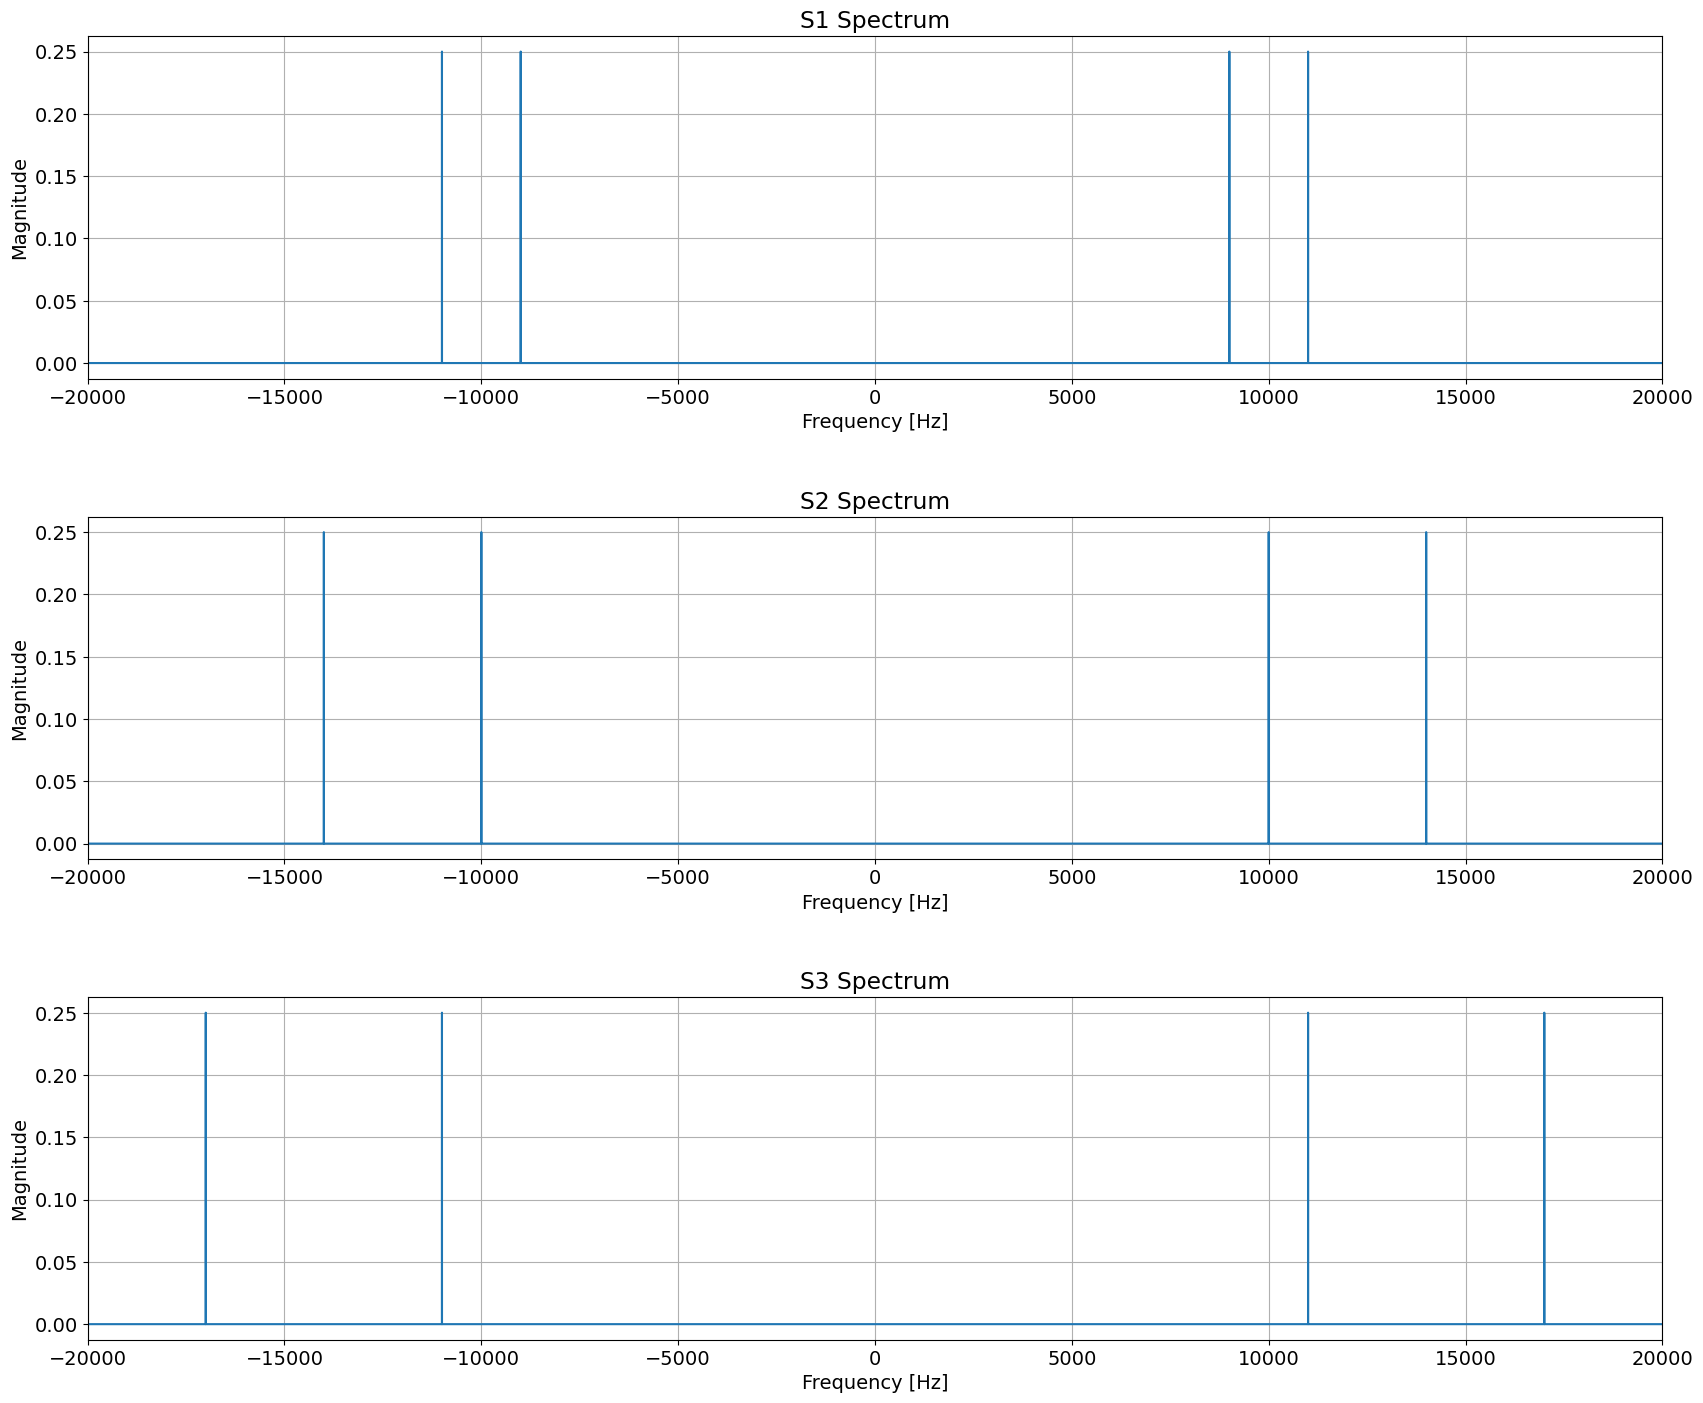

In [25]:
fig, axs = plt.subplots(3, 1, figsize=(18, 15))

axs[0].plot(f, np.abs(S1_f))
axs[0].set_title("S1 Spectrum")
axs[0].set_xlabel("Frequency [Hz]")
axs[0].set_ylabel("Magnitude")
axs[0].set_xlim(-20e3, 20e3)

axs[1].plot(f, np.abs(S2_f))
axs[1].set_title("S2 Spectrum")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Magnitude")
axs[1].set_xlim(-20e3, 20e3)

axs[2].plot(f, np.abs(S3_f))
axs[2].set_title("S3 Spectrum")
axs[2].set_xlabel("Frequency [Hz]")
axs[2].set_ylabel("Magnitude")
axs[2].set_xlim(-20e3, 20e3)

plt.tight_layout(pad=3)
plt.show()